In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For better visualization of confusion matrix

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer # Import the Breast Cancer dataset
from sklearn.preprocessing import StandardScaler

In [19]:
# 1. Load the Breast Cancer Dataset
print("Loading Breast Cancer dataset...")
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print("Dataset loaded.")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target names: {cancer.target_names.tolist()}") # 'malignant', 'benign'

Loading Breast Cancer dataset...
Dataset loaded.
Number of samples: 569
Number of features: 30
Target names: ['malignant', 'benign']


In [20]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [22]:
# Optional: Scale the features
# Scaling is generally good practice for many ML algorithms.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the proportion of target classes is the same in train and test sets.

In [24]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")


Training set size: 455 samples
Test set size: 114 samples
Training target distribution: [170 285]
Test target distribution: [42 72]


In [25]:
# 3. Initialize the Base Estimator (Our Weak Learner)
# For AdaBoost Classifier, a common choice for the base estimator is a DecisionTreeClassifier.
# We use a very shallow tree to make it a "weak learner" (e.g., max_depth=1 is a decision stump).
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
print(f"\nOur chosen 'weak learner' for AdaBoost is: {base_estimator}")


Our chosen 'weak learner' for AdaBoost is: DecisionTreeClassifier(max_depth=1, random_state=42)


In [31]:
# 4. Initialize and Train the AdaBoostClassifier Model
# n_estimators: The maximum number of estimators at which boosting is terminated.
# learning_rate: Shrinks the contribution of each classifier.

adaboost_classifier = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,      # Number of weak learners
    learning_rate=0.1,     # Contribution of each weak learner
    random_state=42
)

In [32]:
print("\nTraining AdaBoost Classifier on Breast Cancer dataset...")
adaboost_classifier.fit(X_train, y_train)
print("Training complete.")


Training AdaBoost Classifier on Breast Cancer dataset...
Training complete.


In [33]:
# 5. Make Predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

In [34]:
# 6. Evaluate the Model's Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=cancer.target_names)

print(f"\nAccuracy on test set: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy on test set: 0.9561

Confusion Matrix:
[[38  4]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



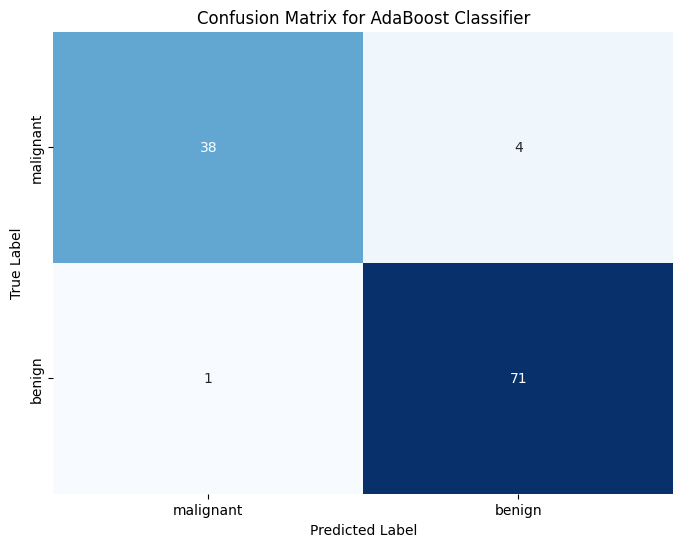


--- Interpretation of Results ---
Accuracy: 95.61% of the test samples were correctly classified.
The confusion matrix shows:
  - True Negatives (Top-Left): 38 samples correctly predicted as 'malignant'
  - False Positives (Top-Right): 4 samples incorrectly predicted as 'benign'
  - False Negatives (Bottom-Left): 1 samples incorrectly predicted as 'malignant'
  - True Positives (Bottom-Right): 71 samples correctly predicted as 'benign'

The classification report provides detailed precision, recall, and F1-score for each class, which are crucial for evaluating classification performance, especially in imbalanced datasets.


In [35]:

# 7. Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

print("\n--- Interpretation of Results ---")
print(f"Accuracy: {accuracy:.2%} of the test samples were correctly classified.")
print("The confusion matrix shows:")
print(f"  - True Negatives (Top-Left): {conf_matrix[0,0]} samples correctly predicted as '{cancer.target_names[0]}'")
print(f"  - False Positives (Top-Right): {conf_matrix[0,1]} samples incorrectly predicted as '{cancer.target_names[1]}'")
print(f"  - False Negatives (Bottom-Left): {conf_matrix[1,0]} samples incorrectly predicted as '{cancer.target_names[0]}'")
print(f"  - True Positives (Bottom-Right): {conf_matrix[1,1]} samples correctly predicted as '{cancer.target_names[1]}'")
print("\nThe classification report provides detailed precision, recall, and F1-score for each class, which are crucial for evaluating classification performance, especially in imbalanced datasets.")